<a href="https://colab.research.google.com/github/lokre22/AI_Final_Project/blob/main/Fake_News_Detection_Using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns 
import nltk
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
fake = pd.read_csv('Fake.csv')

In [ ]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
true = pd.read_csv('True.csv')

In [ ]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
fake.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [ ]:
fake['subject'].value_counts() 

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

<Axes: xlabel='subject', ylabel='count'>

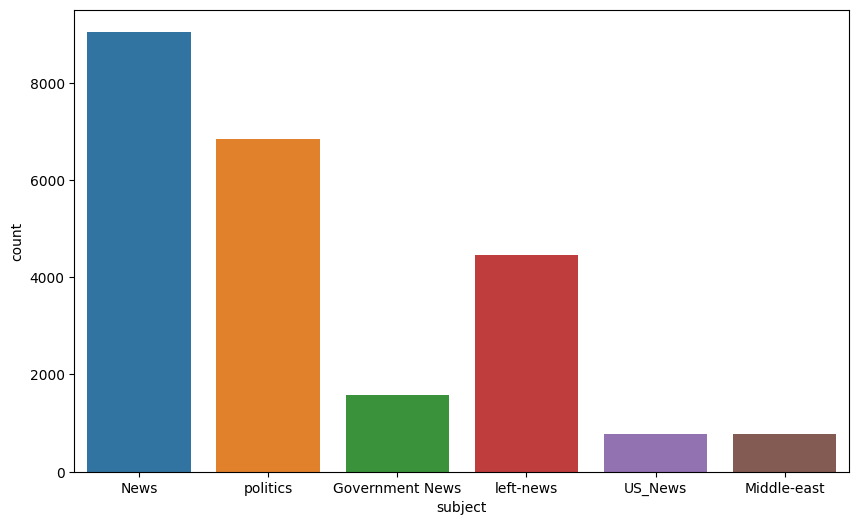

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'subject', data = fake)

WORD COUNT FOR FAKE NEWS


In [ ]:
text = ' '.join(fake['text'].tolist())

In [ ]:
' '.join(['this', 'is', 'a', 'data'])

'this is a data'

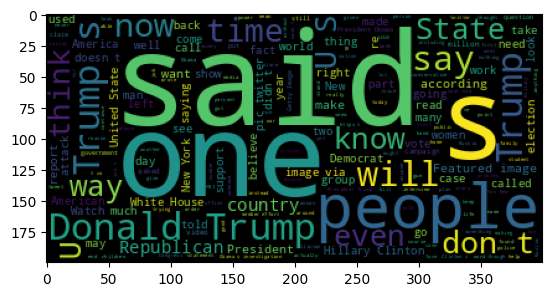

In [ ]:
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud)

WORD COUNT FOR TRUE NEWS

In [ ]:
text = ' '.join(true['text'].tolist())

In [ ]:
' '.join(['this', 'is', 'a', 'data'])

'this is a data'

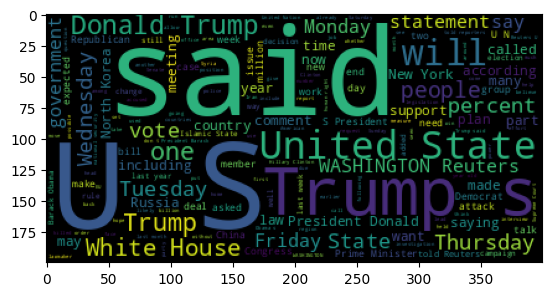

In [ ]:
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud)

CLEANING OF DATA

In [ ]:
true.sample(4)

,title,text,subject,date
6868,Obama defends record on terrorism in national ...,"TAMPA, Fla. (Reuters) - President Barack Obama...",politicsNews,"December 6, 2016"
17439,South Korea parliament chief tells North Korea...,"MOSCOW (Reuters) - Chung Sye-kyun, the speaker...",worldnews,"October 15, 2017"
9491,"Democrats Clinton, Sanders split nominating co...",WASHINGTON (Reuters) - Democrat candidates Hil...,politicsNews,"May 17, 2016"
7535,Security hustles Trump from stage after protes...,"RENO, Nevada/PHILADELPHIA (Reuters) - Republic...",politicsNews,"November 5, 2016"


In [ ]:
unknown_publishers = []
for index, row in enumerate(true.text.values):
  try:
    record = row.split('-', maxsplit=1)
    record[1]

    assert(len(record[0])<120)
  except:
    unknown_publishers.append(index)

In [ ]:
true.iloc[unknown_publishers]

,title,text,subject,date
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
12,Factbox: Trump on Twitter (Dec 28) - Vanity Fa...,The following statements were posted to the ve...,politicsNews,"December 28, 2017"
13,"Trump on Twitter (Dec 27) - Trump, Iraq, Syria",The following statements were posted to the ve...,politicsNews,"December 28, 2017"
14,Man says he delivered manure to Mnuchin to pro...,"(In Dec. 25 story, in second paragraph, corre...",politicsNews,"December 25, 2017"
...,...,...,...,...
20135,China's big money trumps U.S. influence in Cam...,(Story corrects to million from billion in pa...,worldnews,"September 11, 2017"
20500,UK publisher rejected request to block academi...,"(This Sept 8 story corrects headline, clarifi...",worldnews,"September 8, 2017"
20667,Rohingya say their village is lost to Myanmar'...,"(Story refiles to add dropped word not , in ...",worldnews,"September 7, 2017"
21246,'Gates of Hell': Iraqi army says fighting near...,(Story corrects third paragraph to show Mosul...,worldnews,"August 29, 2017"


In [ ]:
len(unknown_publishers)

222

In [ ]:
true.iloc[unknown_publishers].text

7        The following statements were posted to the ve...
8        The following statements were posted to the ve...
12       The following statements were posted to the ve...
13       The following statements were posted to the ve...
14        (In Dec. 25 story, in second paragraph, corre...
                               ...                        
20135     (Story corrects to million from billion in pa...
20500     (This Sept 8 story corrects headline, clarifi...
20667     (Story refiles to add dropped word  not , in ...
21246     (Story corrects third paragraph to show Mosul...
21339     (Story corrects to fix spelling in paragraph ...
Name: text, Length: 222, dtype: object

In [ ]:
true = true.drop(8970, axis = 0)

In [ ]:
publisher = []
tmp_text = []

for index, row in enumerate(true.text.values):
  if index in unknown_publishers:
    tmp_text.append(row)
    publisher.append("Unknown")

  else:
    record = row.split('-', maxsplit=1)
    publisher.append(record[0].strip())
    tmp_text.append(record[1].strip())

In [ ]:
true['publisher'] = publisher
true['text'] = tmp_text

In [ ]:
true.head()

,title,text,subject,date,publisher
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017",WASHINGTON (Reuters)
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017",WASHINGTON (Reuters)
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017",SEATTLE/WASHINGTON (Reuters)


In [ ]:
true.shape


(21416, 5)

In [ ]:
empty_fake_list = [index for index, text in enumerate(fake.text.tolist()) if str(text).strip=="" ]

In [ ]:
fake.iloc[empty_fake_list]

,title,text,subject,date


In [ ]:
true['text'] = true['title'] + " " + true['text']
fake['text'] = fake['title'] + " " + fake['text']

In [ ]:
true['text'] = true['text'].apply(lambda x: str(x).lower())
fake['text'] = fake['text'].apply(lambda x: str(x).lower())

PREPROCESSING OF DATA

In [ ]:
true['class'] = 1
fake['class'] = 0


In [ ]:
true = true[['text', 'class']]
fake = fake[['text', 'class']]

In [ ]:
data = true.append(fake, ignore_index=True)

<ipython-input-172-e9f60034c8a1>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = true.append(fake, ignore_index=True)


In [ ]:
data.sample(6)

,text,class
40271,yikes! hillary still needs help walking on sta...,0
8901,trump to meet indiana governor mike pence over...,1
36698,brilliant: [video] sheriff clarke explains how...,0
21102,germany's merkel ahead of spd rival in tv deba...,1
40634,wow! refugees exposed: here’s the cold hard tr...,0
18963,rights group accuses myanmar of crimes against...,1


In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm
!pip install beautifulsoup4
!pip install textblob
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2023-04-27 20:10:00.870264: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 39.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-b37z_1yd
  Running command git clone --filter=blob:none --quiet https://github.com/laxmimerit/preprocess_kgptalk

In [ ]:
import preprocess_kgptalkie as ps

In [ ]:
data['text'] = data['text'].apply(lambda x: ps.remove_special_chars(x))

In [ ]:
ps.remove_special_chars('this ,.# i$s a@maz!ing')

'this is amazing'

VECTORIZATION: WORD2VEC

In [ ]:
import gensim

In [ ]:
y = data['class'].values

In [ ]:
X = [d.split() for d in data['text'].tolist()]

In [ ]:
DIM = 100
word_vec_model = gensim.models.Word2Vec(sentences=X, vector_size=DIM, window = 10, min_count=1)

In [ ]:
len(word_vec_model.wv)

231872

In [ ]:
word_vec_model.wv['love']


array([ 2.6976178 ,  1.4357743 ,  1.4341121 , -0.55031025, -0.12811744,
        0.48897016,  0.3887545 ,  4.2663198 , -0.18120961,  3.096972  ,
       -0.13435209, -2.7342272 , -3.1758988 , -2.2817073 ,  0.54294604,
       -0.43476483, -1.3440219 ,  1.6195626 ,  2.5629847 , -1.2522465 ,
       -4.5039606 ,  0.3428494 ,  1.1017535 ,  4.3186154 , -3.111844  ,
        3.206366  ,  0.42404318, -1.0825512 , -1.743435  , -2.751963  ,
        0.7988525 , -1.1867093 ,  1.9568694 ,  1.3426847 , -0.6526698 ,
       -0.04245647,  0.48879126,  0.85688347,  0.06230906, -1.8150402 ,
       -0.97976047, -4.088611  , -4.35651   ,  1.0981076 , -3.6618478 ,
        0.30407098,  5.0606728 , -3.568303  ,  0.4479961 ,  0.91703993,
        1.4749577 ,  2.7939172 ,  2.1815708 , -1.3586773 ,  1.6160614 ,
        0.8686755 , -3.670396  , -0.045891  , -2.806078  , -0.5564983 ,
       -4.4622593 , -4.136083  ,  0.6826583 , -2.316115  ,  2.3361328 ,
        1.7443885 ,  1.6547135 ,  4.226828  ,  1.3166412 ,  1.92

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

In [ ]:
X = tokenizer.texts_to_sequences(X)

In [ ]:
tokenizer.word_index

{'the': 1,
 'to': 2,
 'of': 3,
 'a': 4,
 'and': 5,
 'in': 6,
 'that': 7,
 'on': 8,
 'for': 9,
 's': 10,
 'is': 11,
 'he': 12,
 'said': 13,
 'trump': 14,
 'it': 15,
 'with': 16,
 'was': 17,
 'as': 18,
 'his': 19,
 'by': 20,
 'has': 21,
 'be': 22,
 'have': 23,
 'not': 24,
 'from': 25,
 'this': 26,
 'at': 27,
 'are': 28,
 'who': 29,
 'us': 30,
 'an': 31,
 'they': 32,
 'i': 33,
 'but': 34,
 'we': 35,
 'would': 36,
 'president': 37,
 'about': 38,
 'will': 39,
 'their': 40,
 'had': 41,
 'you': 42,
 't': 43,
 'been': 44,
 'were': 45,
 'people': 46,
 'more': 47,
 'or': 48,
 'after': 49,
 'which': 50,
 'she': 51,
 'her': 52,
 'one': 53,
 'if': 54,
 'its': 55,
 'out': 56,
 'all': 57,
 'what': 58,
 'state': 59,
 'when': 60,
 'new': 61,
 'also': 62,
 'up': 63,
 'there': 64,
 'over': 65,
 'no': 66,
 'house': 67,
 'donald': 68,
 'our': 69,
 'states': 70,
 'clinton': 71,
 'obama': 72,
 'government': 73,
 'can': 74,
 'just': 75,
 'him': 76,
 'so': 77,
 'than': 78,
 'republican': 79,
 'other': 80,
 'so

<function matplotlib.pyplot.show(close=None, block=None)>

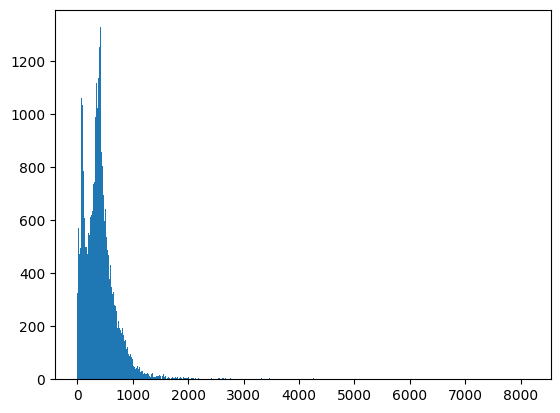

In [ ]:
plt.hist([len(x) for x in X], bins = 700)
plt.show()

In [ ]:
numbers = np.array([len(x) for x in X])
len(numbers[numbers>1000])

1581

In [ ]:
maxlen = 1000
X = pad_sequences(X, maxlen = maxlen)

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
vocab = tokenizer.word_index

In [ ]:
def get_weight_matrix(model):
  weight_matrix = np.zeros((vocab_size, DIM))

  for word, i in vocab.items():
    weight_matrix[i] = model.wv[word]

  return weight_matrix

In [ ]:
embedding_vectors = get_weight_matrix(word_vec_model)

In [ ]:
embedding_vectors.shape

(231873, 100)

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, output_dim = DIM, weights = [embedding_vectors], input_length=maxlen, trainable = False))
model.add(LSTM(units=128))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer='adam', loss="binary_crossentropy", metrics=['acc'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1000, 100)         23187300  
                                                                 
 lstm_1 (LSTM)               (None, 128)               117248    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 23,304,677
Trainable params: 117,377
Non-trainable params: 23,187,300
_________________________________________________________________


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [ ]:
model.fit(X_train, y_train, validation_split=0.3, epochs=6)

Epoch 1/6
737/737 [==============================] - 1350s 2s/step - loss: 0.1530 - acc: 0.9423 - val_loss: 0.0910 - val_acc: 0.9688
Epoch 2/6
737/737 [==============================] - 1370s 2s/step - loss: 0.0522 - acc: 0.9834 - val_loss: 0.1411 - val_acc: 0.9482
Epoch 3/6
737/737 [==============================] - 1372s 2s/step - loss: 0.0305 - acc: 0.9899 - val_loss: 0.0311 - val_acc: 0.9897
Epoch 4/6
737/737 [==============================] - 1376s 2s/step - loss: 0.0195 - acc: 0.9938 - val_loss: 0.0269 - val_acc: 0.9923
Epoch 5/6
737/737 [==============================] - 1375s 2s/step - loss: 0.0111 - acc: 0.9971 - val_loss: 0.0319 - val_acc: 0.9898
Epoch 6/6
737/737 [==============================] - 1435s 2s/step - loss: 0.0055 - acc: 0.9986 - val_loss: 0.0215 - val_acc: 0.9938


In [ ]:
y_pred = (model.predict(X_test) >=0.5).astype(int)

351/351 [==============================] - 199s 565ms/step


In [ ]:
accuracy_score(y_test, y_pred)

0.9940311804008909

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5895
           1       0.99      1.00      0.99      5330

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



In [ ]:
x = ["This is a news"]

In [ ]:
X_test

array([[   0,    0,    0, ...,    3,   40,  245],
       [   0,    0,    0, ...,    8,    1,  592],
       [   0,    0,    0, ...,  175,   30, 1889],
       ...,
       [   0,    0,    0, ...,  197,  175, 3827],
       [   0,    0,    0, ...,    9,  734,  297],
       [   0,    0,    0, ..., 4872,    1,  308]], dtype=int32)

In [ ]:
x = ["This is a news"]
x = tokenizer.texts_to_sequences(x)
x = pad_sequences(x, maxlen=maxlen)

In [ ]:
(model.predict(x) >=0.5).astype(int)

1/1 [==============================] - 0s 110ms/step


array([[0]])

In [ ]:
#TEST USING YOUR OWN HEADLINE FROM ANY SOURCE
x = ["Former Vice President Mike Pence testified on Thursday to a federal grand jury investigating the aftermath of the 2020 election and the actions of then-President Donald Trump and others, sources familiar with the matter told CNN."]
x = tokenizer.texts_to_sequences(x)
x = pad_sequences(x, maxlen=maxlen)
(model.predict(x) >=0.5).astype(int)

1/1 [==============================] - 0s 97ms/step


array([[1]])